## Лабораторная работа №2

## Вариант №6 (индекс счастья)

## Выполнил: ст. гр. М19-ТС Шошин С.А.

1. Визуализируйте корреляции между признаками, находящимися в наборе данных (heatmap). Сделайте выводы.
2. Постройте график счастья по регионам, страны на графике должны представляться отдельными точками.
3. Оцените количество счастья по годам по регионам.
4. Определите наиболее сильно изменяющиеся параметры по разным странам в разные годы.
5. Определите страны, появляющиеся и исчезающие в рейтинге стран.
6. Удалите строки с пропущенными значениями. Выведите размер набора данных до и после удаления.
7. Вычислите корреляцию Пирсона и Спирмена между признаками Trust.Government.Corruption и Family. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.
8. Добавьте в набор данных признак, являющийся суммой двух других признаков.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
yr15 = pd.read_csv('2015.csv')
yr16 = pd.read_csv('2016.csv')
yr17 = pd.read_csv('2017.csv')

In [4]:
yr15.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [5]:
yr15.tail(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [6]:
yr15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
yr15.shape

(158, 12)

In [8]:
yr16.head(10)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [9]:
yr16.tail(10)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
147,Madagascar,Sub-Saharan Africa,148,3.695,3.621,3.769,0.27954,0.46115,0.37109,0.13684,0.07506,0.22040,2.15075
148,Tanzania,Sub-Saharan Africa,149,3.666,3.561,3.771,0.47155,0.77623,0.35700,0.31760,0.05099,0.31472,1.37769
149,Liberia,Sub-Saharan Africa,150,3.622,3.463,3.781,0.10706,0.50353,0.23165,0.25748,0.04852,0.24063,2.23284
150,Guinea,Sub-Saharan Africa,151,3.607,3.533,3.681,0.22415,0.31090,0.18829,0.30953,0.11920,0.29914,2.15604
151,Rwanda,Sub-Saharan Africa,152,3.515,3.444,3.586,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404


In [10]:
yr16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [11]:
yr16.shape

(157, 13)

In [12]:
yr17.head(10)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


In [13]:
yr17.tail(10)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
145,Yemen,146,3.593,3.692750,3.493250,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601
146,South Sudan,147,3.591,3.725539,3.456462,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567
147,Liberia,148,3.533,3.653756,3.412244,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286
148,Guinea,149,3.507,3.584428,3.429572,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312
149,Togo,150,3.495,3.594038,3.395962,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005


In [14]:
yr17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [15]:
yr17.shape

(155, 12)

#### 1.Визуализируйте корреляции между признаками, находящимися в наборе данных (heatmap). Сделайте выводы.

<AxesSubplot:>

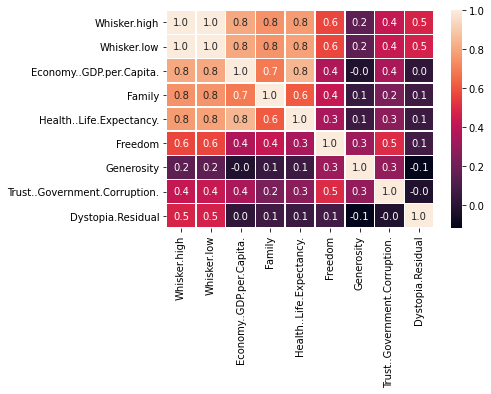

In [16]:
correlation_heatmap = yr17.drop(['Country', 'Happiness.Rank', 'Happiness.Score'], axis=1).corr()
sns.heatmap(correlation_heatmap, annot=True, fmt='.1f', linewidths = .5)

Из данной таблицы и её визуализации можно сделать вывод, что поля: Whisker.high и Whisker.low коррелируют, т.е. взаимосвязаны друг с другом. 
Некоторые признаки имеют достаточно сильную взаимосвязь: Health..Life.Expectancy и Economy..GDP.per.Capita. Другие почти несвязанны, 
например: Dystopia.Residual и Generosity.

#### 2.Постройте график счастья по регионам, страны на графике должны представляться отдельными точками.

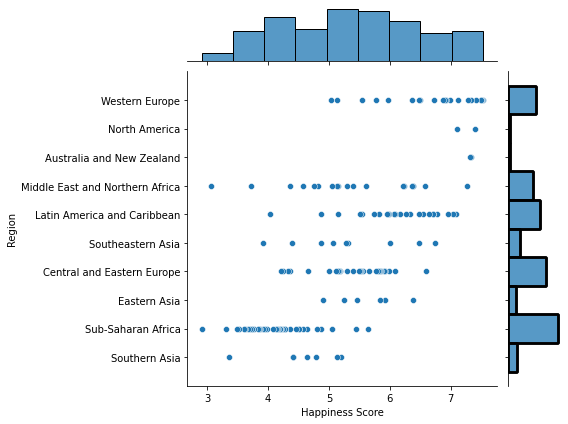

In [17]:
sns.jointplot(x='Happiness Score', y='Region', data=yr16)

#### 3.Оцените количество счастья по годам по регионам.

In [18]:
yr15_1 = yr15.loc[:, ('Country', 'Region')]
yr16_1 = yr16.loc[:, ('Country', 'Region')]
yr15_16 = yr15_1.merge(yr16_1, how='outer')
yr15_16_17 = yr17.merge(yr15_16, on='Country')

pd.DataFrame({
    '2015': yr15.groupby(['Region'])['Happiness Score'].mean(),
    '2016': yr16.groupby(['Region'])['Happiness Score'].mean(),
    '2017': yr15_16_17.groupby(['Region'])['Happiness.Score'].mean()
})

,2015,2016,2017
Region,,,
Australia and New Zealand,7.285000,7.323500,7.299000
Central and Eastern Europe,5.332931,5.370690,5.409931
Eastern Asia,5.626167,5.624167,5.496500
Latin America and Caribbean,6.144682,6.101750,5.957818
Middle East and Northern Africa,5.406900,5.386053,5.369684
North America,7.273000,7.254000,7.154500
Southeastern Asia,5.317444,5.338889,5.444875
Southern Asia,4.580857,4.563286,4.628429
Sub-Saharan Africa,4.202800,4.136421,4.111949


#### 4.Определите наиболее сильно изменяющиеся параметры по разным странам в разные годы.

In [19]:
yr15 = yr15.assign(year=pd.Series(2015, index=yr15.index))
yr16 = yr16.assign(year=pd.Series(2016, index=yr16.index))
yr17 = yr17.assign(year=pd.Series(2017, index=yr17.index))
df_all = pd.concat([yr15, yr16, yr17])
df_all = pd.DataFrame(df_all.sort_values(by='Country', ascending=True))
df_all = df_all.reset_index(drop=True)
print(df_all[['Dystopia Residual', 'Economy (GDP per Capita)', 'Family', 'Freedom', 'Generosity',
              'Health (Life Expectancy)', 'Lower Confidence Interval', 'Standard Error',
              'Trust (Government Corruption)', 'Upper Confidence Interval']].idxmax(axis=1) + ' / ' + df_all['Country'] 
      + ' / ' + df_all['year'].apply(str))

0      Upper Confidence Interval / Afghanistan / 2016
1              Dystopia Residual / Afghanistan / 2015
2                         Family / Afghanistan / 2017
3          Upper Confidence Interval / Albania / 2016
4                  Dystopia Residual / Albania / 2015
                            ...                      
465                            Family / Zambia / 2017
466                 Dystopia Residual / Zambia / 2015
467       Upper Confidence Interval / Zimbabwe / 2016
468               Dystopia Residual / Zimbabwe / 2015
469                          Family / Zimbabwe / 2017
Length: 470, dtype: object


#### 5. Определите страны, появляющиеся и исчезающие в рейтинге стран.

In [20]:
df_all = pd.concat([yr15, yr16, yr17])
df_all = pd.DataFrame(df_all.sort_values(by='Country', ascending=True))
df_all = df_all.reset_index(drop=True)
df_all = df_all['Country'].drop_duplicates(keep=False)
df_all.reset_index(drop=True)
df_all

114                    Djibouti
168     Hong Kong S.A.R., China
315                        Oman
340                 Puerto Rico
376           Somaliland Region
377           Somaliland region
397                   Swaziland
409    Taiwan Province of China
Name: Country, dtype: object

#### 6. Удалите строки с пропущенными значениями. Выведите размер набора данных до и после удаления.

In [21]:
print('До удаления: ', yr15.shape, yr16.shape, yr17.shape)
print('После: ', yr15.dropna().shape, yr16.dropna().shape, yr17.dropna().shape)

До удаления:  (158, 13) (157, 14) (155, 13)
После:  (158, 13) (157, 14) (155, 13)


#### 7. Вычислите корреляцию Пирсона и Спирмена между признаками Trust.Government.Corruption и Family. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

(0.20560511187180402, 0.009551833256262039)
SpearmanrResult(correlation=0.18459942329799503, pvalue=0.020235828494205098)


C:\Users\Serega\Desktop\WPy64-3870\python-3.8.7.amd64\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Приемлимое значение p-value для корреляции Спирмена
Приемлимое значение p-value для корреляции Пирсона


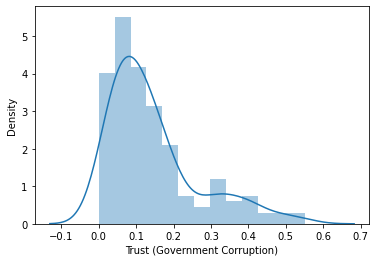

In [22]:
print(stats.pearsonr(yr15['Trust (Government Corruption)'], yr15['Family']))
print(stats.spearmanr(yr15['Trust (Government Corruption)'], yr15['Family']))
sns.distplot(yr15['Trust (Government Corruption)'])
if stats.spearmanr(yr15['Trust (Government Corruption)'], yr15['Family'])[1] < 0.05:
    print('Приемлимое значение p-value для корреляции Спирмена')
else:
    print('Не приемлимое значение p-value для корреляции Спирмена')
if stats.pearsonr(yr15['Trust (Government Corruption)'], yr15['Family'])[1] < 0.05:
    print('Приемлимое значение p-value для корреляции Пирсона')
else:
    print('Не приемлимое значение p-value для корреляции Пирсона')

C:\Users\Serega\Desktop\WPy64-3870\python-3.8.7.amd64\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Family', ylabel='Density'>

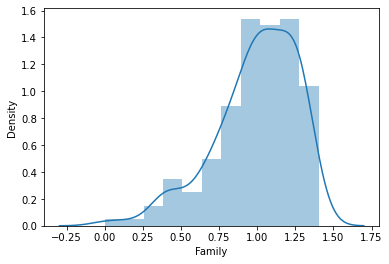

In [23]:
sns.distplot(yr15['Family'])

#### 8. Добавьте в набор данных признак, являющийся суммой двух других признаков.

In [24]:
yr15 = yr15.assign(Sign=pd.Series(yr15['Family'] + yr15['Generosity'], index=yr15.index))
yr15

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year,Sign
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,1.64629
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,1.83853
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,1.70197
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,1.67794
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,1.78072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015,0.99998
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015,0.53646
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015,0.94668
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015,0.61314
